## Name: Jose Aries E. De Los Santos
## DS397 Machine Problem 1 1a

# Import Necessary modules and Libraries

# **PROBLEM 1: Taiwan House Price Prediction**

In [ ]:
# !pip install ipympl

In [ ]:
# %matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from google.colab import output
output.enable_custom_widget_manager()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
##Code to be used if will be imported from google drive
# from google.colab import drive

# drive.mount('/content/drive')
# myfile = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem/real_estate_taiwan.csv"
# df = pd.read_csv(myfile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the data set in Python using Pandas.

In [ ]:
df = pd.read_csv("real_estate_taiwan.csv")
# df.columns
#Check the parts of the data set that we will need
df.dropna(axis=0, inplace=True)                 # Discard rows with missing values
df[['X2 house age','X3 distance to the nearest MRT station','Y house price of unit area']].head(21)


,X2 house age,X3 distance to the nearest MRT station,Y house price of unit area
0,32.0,84.87882,37.9
1,19.5,306.59470,42.2
2,13.3,561.98450,47.3
3,13.3,561.98450,54.8
4,5.0,390.56840,43.1
5,7.1,2175.03000,32.1
6,34.5,623.47310,40.3
7,20.3,287.60250,46.7
8,31.7,5512.03800,18.8
9,17.9,1783.18000,22.1


In [ ]:
##Check some Statistics Information
df[['X2 house age','X3 distance to the nearest MRT station','Y house price of unit area']].describe()

,X2 house age,X3 distance to the nearest MRT station,Y house price of unit area
count,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,37.980193
std,11.392485,1262.109595,13.606488
min,0.000000,23.382840,7.600000
25%,9.025000,289.324800,27.700000
50%,16.100000,492.231300,38.450000
75%,28.150000,1454.279000,46.600000
max,43.800000,6488.021000,117.500000


## Extract the features and the target variable

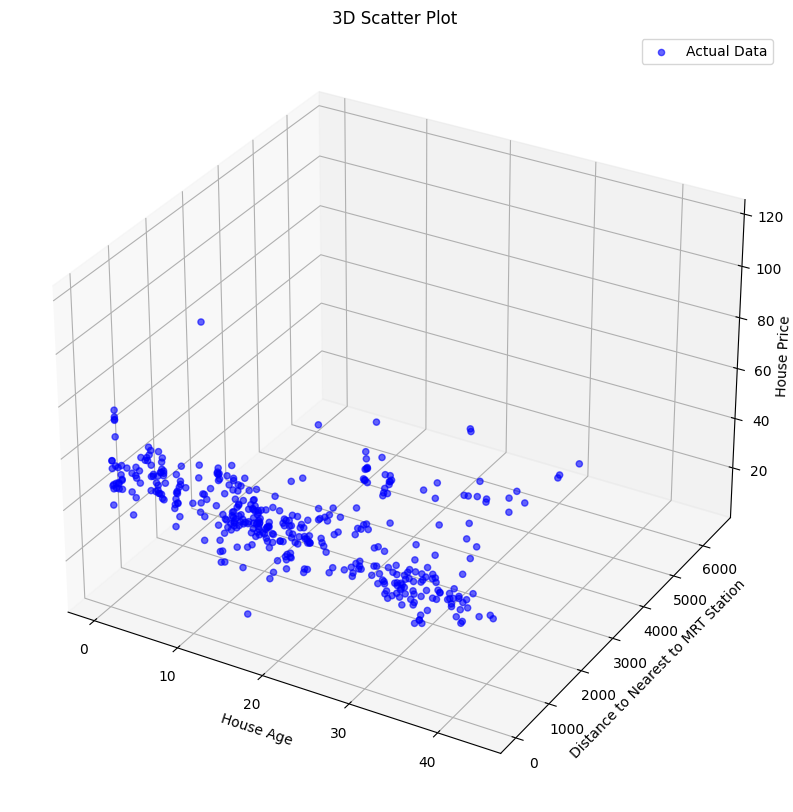

In [ ]:
# “House Age” and “Distance to nearest MRT station” features
# For y, take 'House Price'

X = df.iloc[:,2:4].to_numpy()
y = df.iloc[:,-1].to_numpy().reshape(-1,1)

#alternatively since we only have two features
# X = df[["X2 house age","X3 distance to the nearest MRT station"]].to_numpy()
# y = df["Y house price of unit area"].to_numpy().reshape(-1,1)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0],X[:,1],y, color='blue', alpha=0.6,label="Actual Data")
ax.set_xlabel("House Age")
ax.set_ylabel("Distance to Nearest to MRT Station")
ax.set_zlabel("House Price")
ax.set_title("3D Scatter Plot")
ax.zaxis.labelpad = -0.3
plt.legend()
plt.show()


## Split the data into 70% training and 30% testing

(289, 2)
(289, 1)
(125, 2)
(125, 1)
289
125


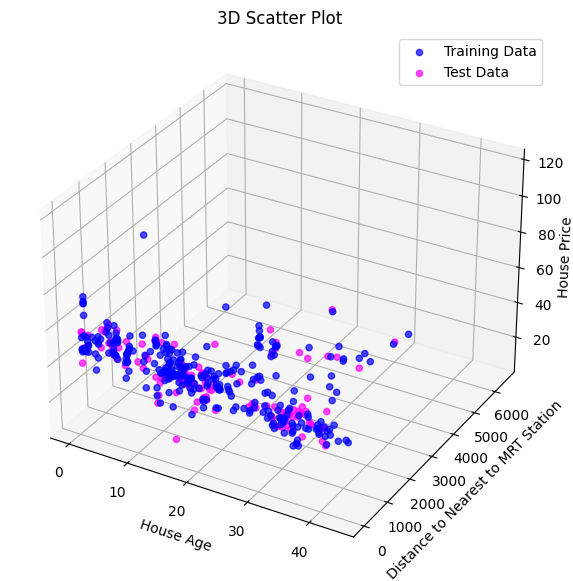

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Checking the dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

N_train, N_test = len(y_train), len(y_test) ## To be used later for intercepts
print(N_train)
print(N_test)

##Plot Training data and Test Data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,1],y_train, color='blue', alpha=0.7,label="Training Data")
ax.scatter3D(X_test[:,0],X_test[:,1],y_test, color='magenta', alpha=0.7,label="Test Data")
ax.set_xlabel("House Age")
ax.set_ylabel("Distance to Nearest to MRT Station")
ax.set_zlabel("House Price")
ax.zaxis.labelpad = -0.4
ax.set_title("3D Scatter Plot")
plt.legend()
plt.show()

## Normalize the data using Standard Scaling
“fit_transform” on the training set, then “transform” on the test set

In [ ]:
scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

## Plot the data to see the normalized data versus the original data.

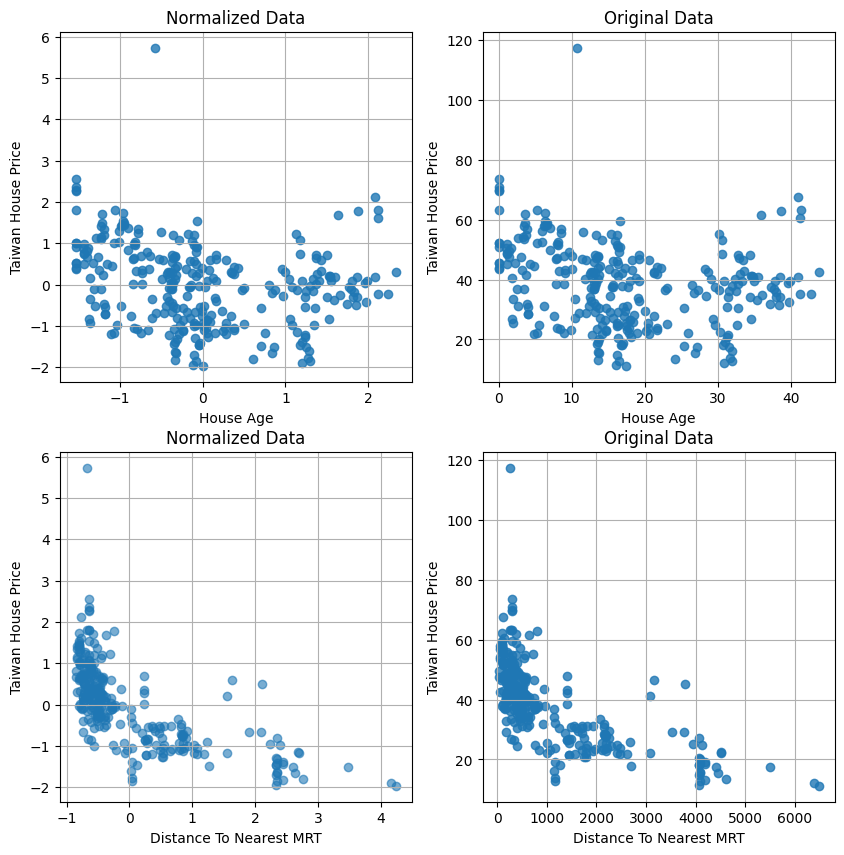

In [ ]:
plt.figure(figsize=(10,10))

##House Age vs House Price
plt.subplot(221)
plt.title('Normalized Data')
plt.scatter(X_train_scaled[:,0],y_train_scaled, alpha = 0.8)
plt.xlabel('House Age')
plt.ylabel('Taiwan House Price')
plt.grid()
plt.subplot(222)
plt.title('Original Data')
plt.scatter(X_train[:,0],y_train, alpha = 0.8)
plt.xlabel('House Age')
plt.ylabel('Taiwan House Price')
plt.grid()

## Distance vs House Price
plt.subplot(223)
plt.title('Normalized Data')
plt.scatter(X_train_scaled[:,1],y_train_scaled, alpha = 0.6)
plt.xlabel('Distance To Nearest MRT')
plt.ylabel('Taiwan House Price')
plt.grid()

plt.subplot(224)
plt.title('Original Data')
plt.scatter(X_train[:,1],y_train, alpha = 0.8)
plt.xlabel('Distance To Nearest MRT')
plt.ylabel('Taiwan House Price')
plt.grid()

plt.show()

## **1a Multiple Linear Regression**

### Perform Linear Regression

Given: $y = w_{0} x_{0} + w_{1} x_{1} + w_{2} x_{2} + ...$

It follows that we will have:
$$
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\
    \vdots
\end{bmatrix}
=
\begin{bmatrix}
    1 & x_{11} & x_{12} & \cdots \\
    1 & x_{21} & x_{22} & \cdots \\
    1 & x_{31} & x_{32} & \cdots\\
    \vdots & \vdots & \vdots & \vdots
\end{bmatrix}
\begin{bmatrix}
    w_{0} \\
    w_{1} \\
    w_{2} \\
    \vdots
\end{bmatrix}
$$



Then perform Moore-Penrose Pseudo-inverse:
 $w = (X^{T}X)^{-1} X^{T} y$

In [ ]:
X_train_design = np.hstack((np.ones((N_train,1)),X_train_scaled))
X_test_design = np.hstack((np.ones((N_test,1)),X_test_scaled))

##Perform Moore-Penrose Pseudo-inverse
##Using weights with intercept
W_int = np.linalg.inv(X_train_design.T @ X_train_design) @ X_train_design.T @ y_train_scaled
print('Weights with intercept:')
print(W_int)

Weights with intercept:
[[ 4.13629979e-16]
 [-2.11583419e-01]
 [-6.65246626e-01]]


### Evaluate the model for training and test data

$\textbf{R}^{2}$:

$R^{2} = \left( 1 - \frac{\sum^{n}_{i=1}(y_{i} - \hat{y}_{i})^{2}}{\sum^{n}_{i=1}(y_{i} - \bar{y}_{i})^{2}} \right) \cdot 100\%$

where:


*   $y_{i}$ actual values
*   $\hat{y}_{i}$ predicted values
*   $\bar{y}_{i}$ mean of the actual values


\\


$\textbf{RMSE (Root Mean Squared Error)}$:

RMSE = $\sqrt{\frac{1}{n} \sum^{n}_{i=1} (y_{i} - \hat{y}_{i})^{2}}$

where:

*   $y_{i}$ actual values
*   $\hat{y}_{i}$ predicted values
*   n - total number of points





  Training RMSE:	0.7077035990718612
  Test RMSE:	0.6936797344746282
  Training R2:	0.4991556158607343
  Test R2:	0.4622754524417646


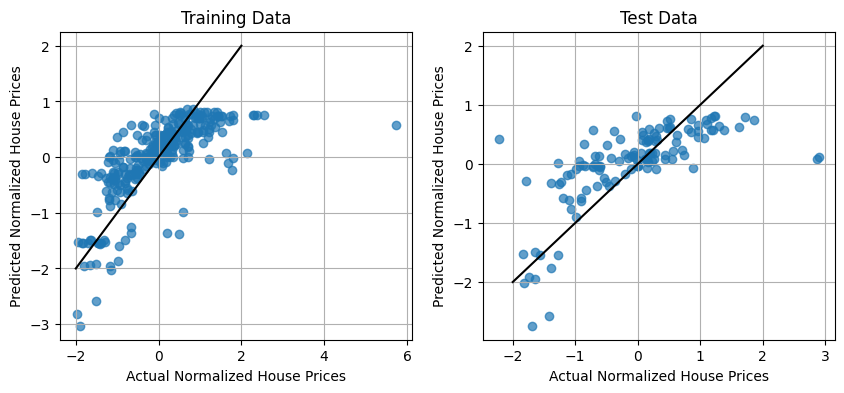

In [ ]:
##Make predictions by substituting back into y = wx

#We can do this (strongly recommended if we have multiple features)
y_train_pred = X_train_design @ W_int
y_test_pred = X_test_design @ W_int

##Or we can do this since we only have two features
# y_train_pred = (X_train_design[:,0] * W_int[0] + X_train_design[:,1] * W_int[1] + X_train_design[:,2] * W_int[2]).reshape(-1,1)
# y_test_pred = (X_test_design[:,0] * W_int[0] + X_test_design[:,1] * W_int[1] + X_test_design[:,2] * W_int[2]).reshape(-1,1)


##Calculate RMSE and R2 for both training and testing
y_train_MSE = np.sum((y_train_pred - y_train_scaled) ** 2)
y_train_R2 = 1 - y_train_MSE/np.sum((y_train_scaled - np.mean(y_train_scaled)) ** 2)
y_train_MSE /= len(y_train_pred)
y_train_RMSE = np.sqrt(y_train_MSE)

y_test_MSE = np.sum((y_test_pred - y_test_scaled) ** 2)
y_test_R2 = 1 - y_test_MSE/np.sum((y_test_scaled - np.mean(y_test_scaled)) ** 2)
y_test_MSE /= len(y_test_pred)
y_test_RMSE = np.sqrt((y_test_MSE)) #RMSE

##Print out the results
# print(f"  Training MSE:\t{y_train_MSE}")
# print(f"  Test MSE:\t{y_test_MSE}")
print(f"  Training RMSE:\t{y_train_RMSE}")
print(f"  Test RMSE:\t{y_test_RMSE}")
print(f"  Training R2:\t{y_train_R2}")
print(f"  Test R2:\t{y_test_R2}")

##Visualization
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.title('Training Data')
plt.scatter(y_train_scaled, y_train_pred, alpha = 0.7)
plt.xlabel('Actual Normalized House Prices')
plt.ylabel('Predicted Normalized House Prices')
plt.plot([-2,2],[-2,2],"k")
plt.grid()
plt.subplot(122)
plt.title('Test Data')
plt.scatter(y_test_scaled,y_test_pred,alpha=0.7)
plt.xlabel('Actual Normalized House Prices')
plt.ylabel('Predicted Normalized House Prices')
plt.plot([-2,2],[-2,2],"k")
plt.grid()

plt.show()

### Convert back into Original Scale

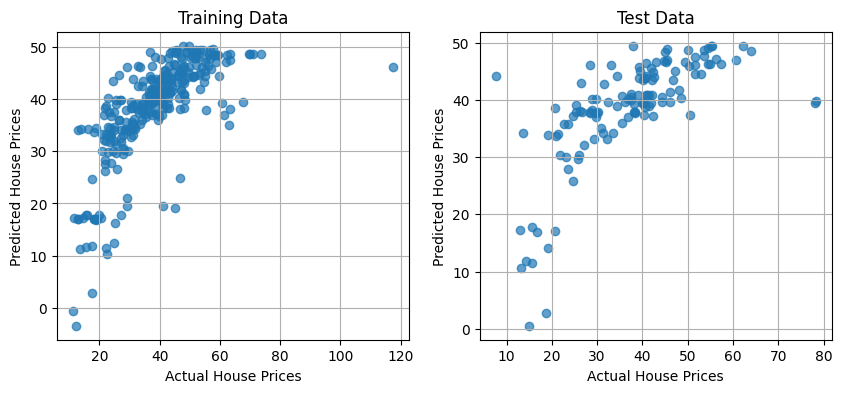

In [ ]:
##Inverse Transform to convert Normalized Scale into Original Scale
y_train_pred_orig = scalerY.inverse_transform(y_train_pred)
y_test_pred_orig = scalerY.inverse_transform(y_test_pred)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.title('Training Data')
plt.scatter(y_train, y_train_pred_orig, alpha = 0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid()
plt.subplot(122)
plt.title('Test Data')
plt.scatter(y_test,y_test_pred_orig,alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.grid()

plt.show()

### 3D Plot

#### Normalized 3D plot

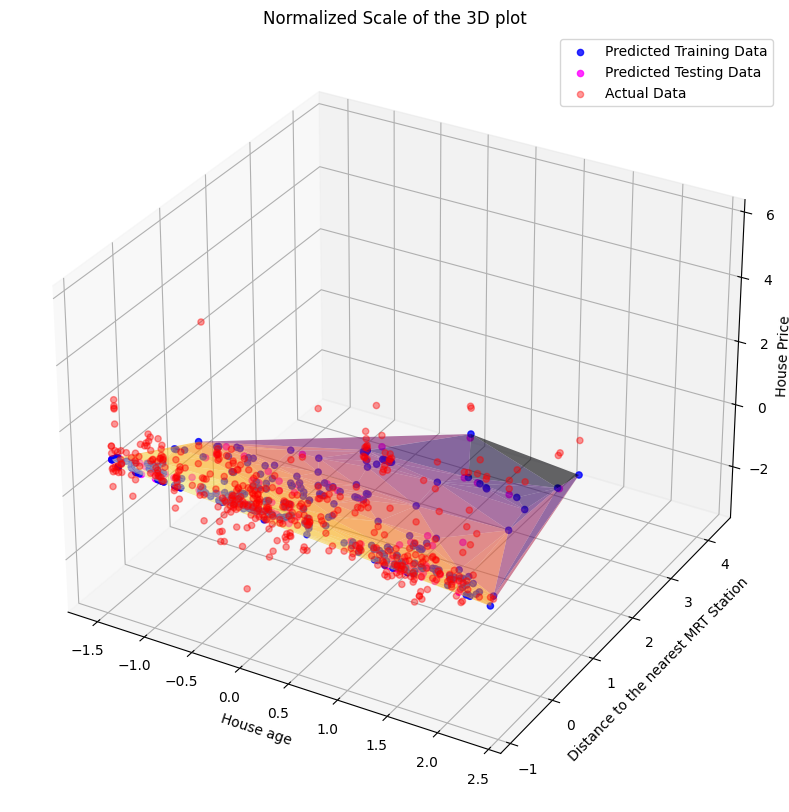

In [ ]:
##Enable Interactive 3D plot in google Collab
# %matplotlib widget
# from google.colab import output
# output.enable_custom_widget_manager()
# output.disable_custom_widget_manager()

# Generate data for surface plot
x1 = np.linspace(np.min(X_train_scaled[:,0])-1, np.max(X_train_scaled[:,0])+1, 100)
x2 = np.linspace(np.min(X_train_scaled[:,1])-1, np.max(X_train_scaled[:,1])+1, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = W_int[0] + W_int[1] * X1 + W_int[2] * X2

#z + ax + by
plane = W_int[0] + X_train_design[:,1]*W_int[1] + X_train_design[:,2]*W_int[2]

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')


ax.scatter3D(X_train_design[:,1],X_train_design[:,2],y_train_pred, color='blue', alpha=0.8,label="Predicted Training Data")
ax.scatter3D(X_test_design[:,1],X_test_design[:,2],y_test_pred, color='magenta', alpha=0.8,label="Predicted Testing Data")
ax.scatter3D(X_train_design[:,1],X_train_design[:,2],y_train_scaled, color='red', alpha=0.4,label="Actual Data")
ax.scatter3D(X_test_design[:,1],X_test_design[:,2],y_test_scaled, color='red', alpha=0.4,label="")
ax.plot_trisurf(X_train_design[:,1],X_train_design[:,2],plane, cmap="inferno", alpha=0.6)
ax.set_title("Normalized Scale of the 3D plot")
ax.set_xlabel("House age")
ax.set_ylabel("Distance to the nearest MRT Station")
ax.set_zlabel("House Price")
ax.zaxis.labelpad = -0.3
plt.legend()
plt.show()

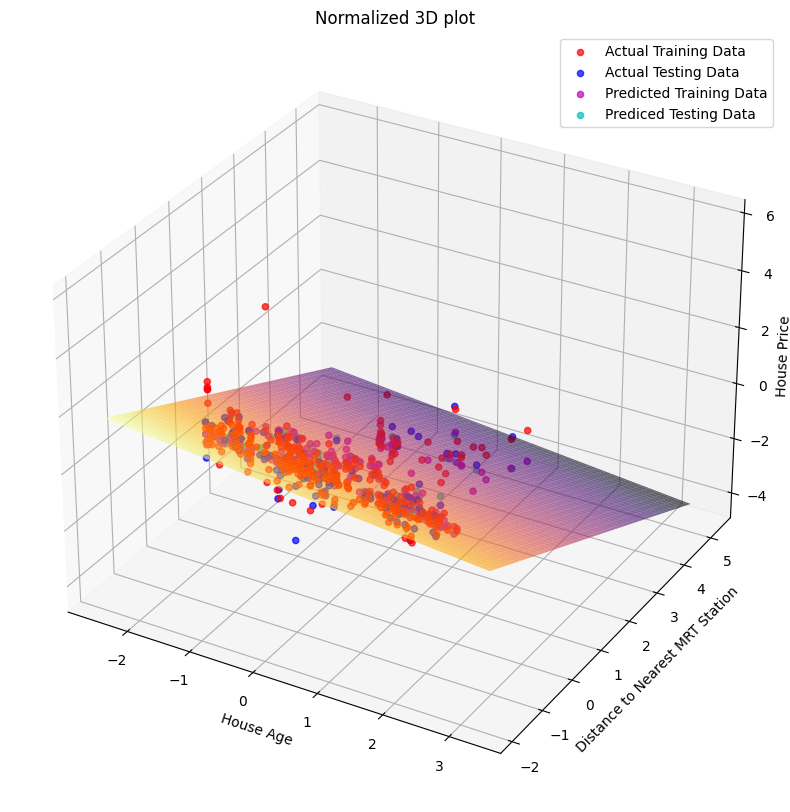

In [ ]:
# Generate data for surface plot
x1 = np.linspace(np.min(X_train_scaled[:,0])-1, np.max(X_train_scaled[:,0])+1, 100)
x2 = np.linspace(np.min(X_train_scaled[:,1])-1, np.max(X_train_scaled[:,1])+1, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = W_int[0] + W_int[1] * X1 + W_int[2] * X2

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter3D(X_train_scaled[:,0], X_train_scaled[:,1], y_train_scaled, alpha=0.7,color='r', label="Actual Training Data")
ax.scatter3D(X_test_scaled[:,0], X_test_scaled[:,1], y_test_scaled, alpha=0.7,color='b', label="Actual Testing Data")
ax.scatter3D(X_train_scaled[:,0], X_train_scaled[:,1], y_train_pred, alpha=0.7,color='m', label="Predicted Training Data")
ax.scatter3D(X_test_scaled[:,0], X_test_scaled[:,1], y_test_pred, alpha=0.7,color='c', label="Prediced Testing Data")


# Plot the surface
ax.plot_surface(X1, X2, Z, alpha=0.6, cmap='inferno')

# Set labels
ax.set_xlabel("House Age")
ax.set_ylabel("Distance to Nearest MRT Station")
ax.set_zlabel("House Price")
ax.zaxis.labelpad = -0.4
ax.set_title("Normalized 3D plot")

plt.legend()
plt.show()

#### Original 3D plot

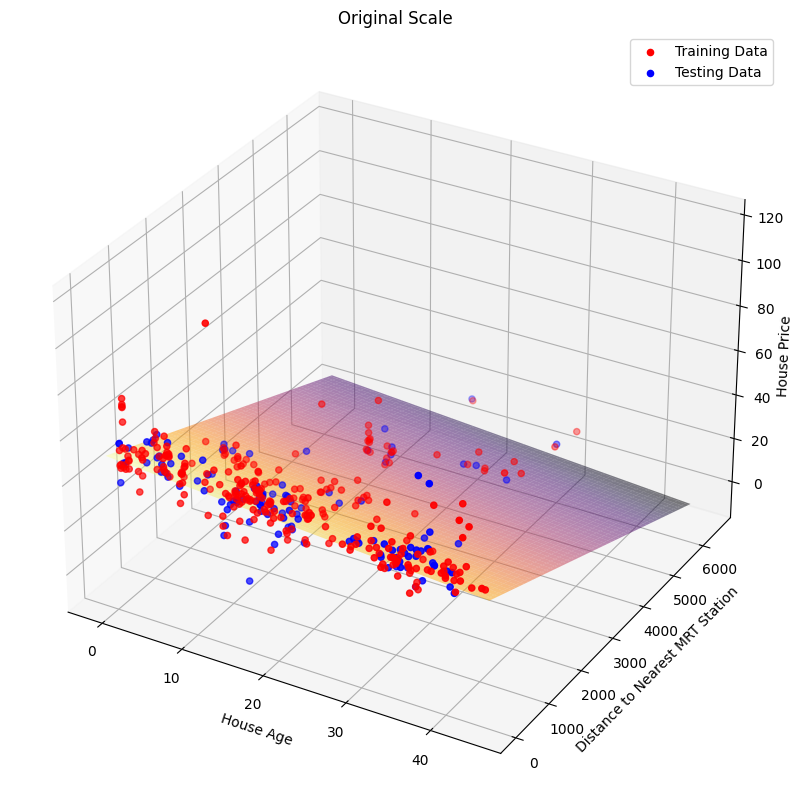

In [ ]:
# Generate data for surface plot
x1 = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100)
x2 = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]  # Flatten meshgrid to a 2D array
X_grid_scaled = scalerX.transform(X_grid)  # Scale the flattened meshgrid


##To create the predicted surface we can do this
intercept = np.ones((X_grid_scaled.shape[0],1))
A = np.hstack((intercept, X_grid_scaled))
surface_scaled = A @ W_int
surface_plot = scalerY.inverse_transform(surface_scaled).reshape(X1.shape)

##Or Since we only have two features we can also do this
X1_scaled = X_grid_scaled[:, 0].reshape(X1.shape)  # Reshape back to meshgrid
X2_scaled = X_grid_scaled[:, 1].reshape(X2.shape)
Z = W_int[0] + W_int[1] * X1_scaled + W_int[2] * X2_scaled
# surface_plot = scalerY.inverse_transform(Z).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, surface_plot, alpha=0.5, cmap='inferno')

# Scatter plot of the data points
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='r', label='Training Data')
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='b', label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.2
ax.set_title("Original Scale")
plt.legend()
plt.show()

#### Using Built-in for the 3D plot

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Get the optimized weights (coefficients) including the intercept
W_int_built_in = np.concatenate([model.intercept_, model.coef_[0]])

print(f" Optimized weights from built-in method: {W_int_built_in}", )


 Optimized weights from built-in method: [ 4.45739593e-16 -2.11583419e-01 -6.65246626e-01]


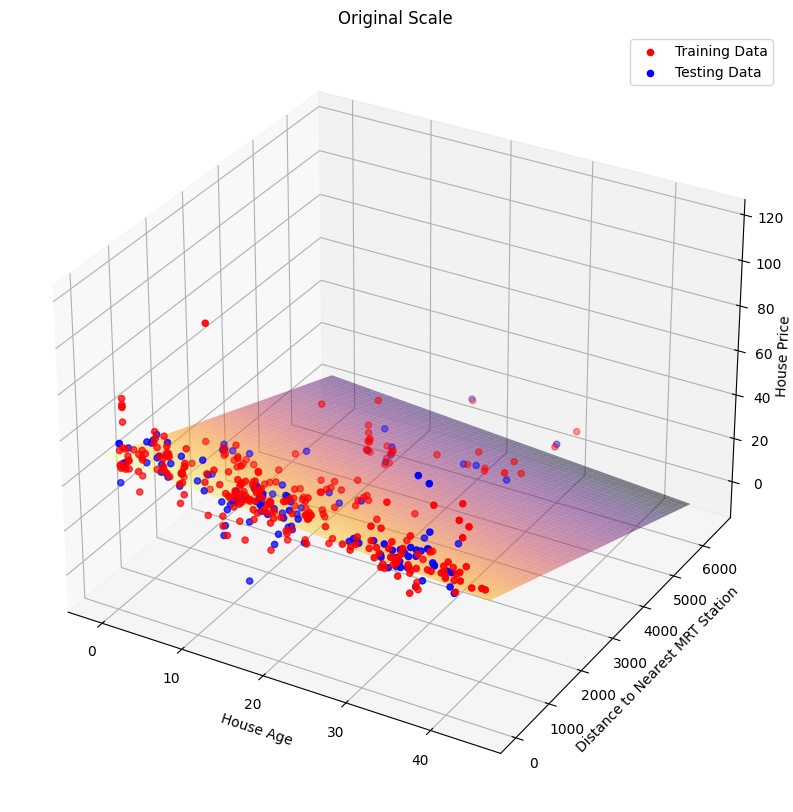

In [ ]:
# Generate data for surface plot
x1 = np.linspace(np.min(X_train[:,0])-1, np.max(X_train[:,0])+1, 100)
x2 = np.linspace(np.min(X_train[:,1])-1, np.max(X_train[:,1])+1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]
X_grid_scaled = scalerX.transform(X_grid)

##Plotting the Surface plot we can do this
M = np.hstack((np.ones((X_grid_scaled.shape[0],1)), X_grid_scaled))
y_pred = scalerY.inverse_transform(M @ W_int_built_in.reshape(-1,1)).reshape(X1.shape)

##Or this
y_pred_scaled = model.predict(X_grid_scaled)
# y_pred = scalerY.inverse_transform(y_pred_scaled).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_pred, alpha=0.5, cmap='inferno')

# Scatter plot of the data points
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='r', label='Training Data')
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='b', label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.3
ax.set_title("Original Scale")

plt.legend()
plt.show()

### What can be said about the performance of Multiple Linear Regression




When data is collected through experiments, there typically exists some degree of measurement "error," preventing the identification of a curve that perfectly aligns with all data points. Therefore, the approach is to select the curve (by establishing its coefficients or weights in this problem) that most accurately represents the data.

For this problem 1a, we performed Linear Regression. Linear Regression is a Statistical method or Mathematical Method that tries to find a linear relationship between our indepedent variables (in our problem, our two features "House age" and "Distance to nearest MRT") and the dependent variables (in our problem this is the "House price", since we only have one target). In this case we are trying the find the best plane that will fit our data points. However, just by observing our $R^{2}$ metric we got around 46% for our training dataset and around 49% in our testing dataset. In the $R^{2}$ the closer it is to 100% the better fit we have for our dataset. A $46 \%$ or a $49 \%$ $R^{2}$ value may indicate that the model might not be capturing all the relevant factors influencing house prices. However for this problem, the difference between our predicted values $y_{pred}$ and actual values $y_{true}$ or also known as a $\textbf{residual}$ or predicted error might be too large. Observing from the scatter plot of the dataset we also have some outliers as well. Linear regression needs the relationship between the independent and dependent variables to be linear or it assumes that the relationship between the independent and dependent variables is linear. If the relationship is nonlinear, it may not capture the true underlying pattern. Linear regression can be sensitive to outliers, which are data points that deviate significantly from the rest of the data. Outliers can unduly influence the estimation of the regression coefficients and decrease the model's predictive accuracy